In [2]:
import pandas as pd
import scipy.stats as ss
import matplotlib.pyplot as plt
import numpy as np

Load the file weights.csv with babies weights into a pandas dataframe.

In [4]:
#load the data
dataset = pd.read_csv("07 weights.csv")

In [5]:
dataset.head()

,baby_weight
0,9.84
1,9.38
2,8.88
3,8.79
4,9.83


In [6]:
weights = dataset.baby_weight

Plot the histogram for the weights.

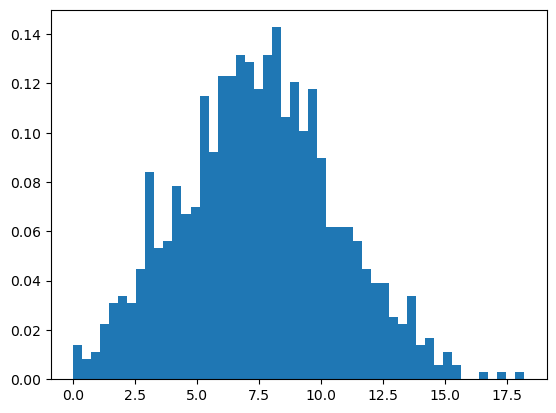

In [9]:
count, bins, ignored = plt.hist(weights, bins = 50, density=True, stacked=True)

Use normaltest() from scipy.stats to test whether the sample of weights differs from a normal distribution.

In [10]:
_ , p = ss.normaltest(weights)
if p < 0.05:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")

The null hypothesis cannot be rejected


Compute the mean and standard deviation of the sample of exam durtions

In [16]:
mu = dataset['baby_weight'].mean()
sigma = dataset['baby_weight'].std()
print(mu, sigma)

7.495310274669385 3.11200403672765


Plot the histogram of weights and the probability distribution curve.

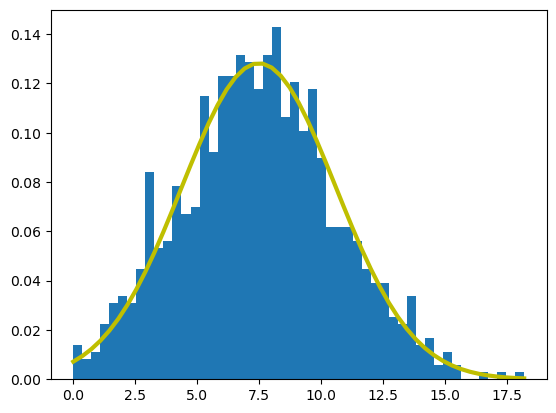

In [17]:
count, bins, ignored = plt.hist(weights, bins = 50, density=True, stacked=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
    np.exp( - (bins - mu)**2 / (2 * sigma**2) ),       linewidth=3, color='y')
plt.show()

Declare a normally distributed model for babies weights

In [18]:
predictive_model = ss.norm(mu, sigma)

### Answer the following question.

 1. What is the probability that a random selected baby  with weigh 10.3 lbs?

The probability that a random selected baby with weight 10.3 lbs = 0

2. What is the probability that a randomly selected weight will exceeds 12 lbs?

In [21]:
1 - predictive_model.cdf(12)

0.07387559569439328

3. What is the probability that a randomly selected weight will be between 7 and 11 lbs?

In [22]:
predictive_model.cdf(11) - predictive_model.cdf(7)

0.4331852777582738

4. In what weight range would 80% of the babies lie?
- P(w < x) = 0.1
- P(w < y) = 0.9

In [24]:
res = predictive_model.ppf(0.1), predictive_model.ppf(0.9)
res

(3.507116629419949, 11.483503919918821)